In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ~/bmi_dynamics_code/

/Users/preeyakhanna/bmi_dynamics_code


In [3]:
### Plot frac sig. neurons by #of neurons included in decoder ###

In [32]:
from online_analysis import plot_fr_diffs, util_fcns
import analysis_config

online_analysis/plot_fr_diffs.py:1421: RuntimeWarning: invalid value encountered in double_scalars
  perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))
online_analysis/plot_fr_diffs.py:1421: RuntimeWarning: divide by zero encountered in double_scalars
  perc_sig[animal, day_ix][mag, ang, mov].append(np.array((pv, dFR, dFR/global_mean_FR[i_neur], global_mean_FR[i_neur]), dtype=dtype_su))


grom, 0, # of com-conds analyzed 237, # pop. sig 137


Num sig neurons 32 / 44, Animal grom, day 0


grom, 1, # of com-conds analyzed 147, # pop. sig 67


Num sig neurons 17 / 35, Animal grom, day 1


grom, 2, # of com-conds analyzed 215, # pop. sig 130


Num sig neurons 69 / 148, Animal grom, day 2


grom, 3, # of com-conds analyzed 288, # pop. sig 116


Num sig neurons 32 / 53, Animal grom, day 3


grom, 4, # of com-conds analyzed 211, # pop. sig 82


Num sig neurons 53 / 151, Animal grom, day 4


grom, 5, # of com-conds analyzed 282, # pop. sig 61


Num sig neurons 24 / 42, Animal grom, day 5


grom, 6, # of com-conds analyzed 69, # pop. sig 20


Num sig neurons 13 / 50, Animal grom, day 6


grom, 7, # of com-conds analyzed 124, # pop. sig 32


Num sig neurons 17 / 48, Animal grom, day 7


grom, 8, # of com-conds analyzed 108, # pop. sig 36


Num sig neurons 23 / 48, Animal grom, day 8


jeev, 0, # of com-conds analyzed 150, # pop. sig 113


Num sig neurons 19 / 20, Animal jeev, day

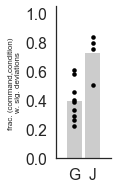

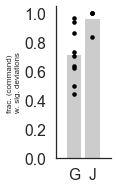

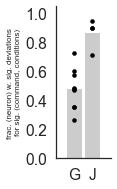

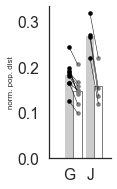

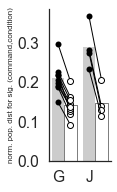

In [6]:
#### results if NO position matching + making sure Nglobal >>  2*NCommand
ps, psv, nit, pooled_stats = plot_fr_diffs.perc_neuron_command_move_sig(nshuffs=1000, 
                                                                        keep_bin_spk_zsc=False, 
                                                                        match_pos = False, 
                                                                       factor_global_gt_mov = 2)
## Use this to PRINT # sig neurons / total for each animal / day 
plot_fr_diffs.plot_pooled_stats_fig3_science_compression(pooled_stats, save=False)


<IPython.core.display.Javascript object>


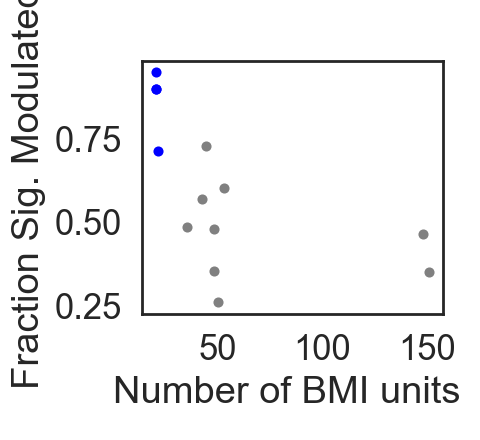

In [99]:
# Num sig neurons 32 / 44, Animal grom, day 0
# Num sig neurons 17 / 35, Animal grom, day 1
# Num sig neurons 69 / 148, Animal grom, day 2
# Num sig neurons 32 / 53, Animal grom, day 3
# Num sig neurons 53 / 151, Animal grom, day 4
# Num sig neurons 24 / 42, Animal grom, day 5
# Num sig neurons 13 / 50, Animal grom, day 6
# Num sig neurons 17 / 48, Animal grom, day 7
# Num sig neurons 23 / 48, Animal grom, day 8

# Num sig neurons 19 / 20, Animal jeev, day 0
# Num sig neurons 18 / 20, Animal jeev, day 1
# Num sig neurons 18 / 20, Animal jeev, day 2
# Num sig neurons 15 / 21, Animal jeev, day 3


# grom 0, 90 | 95 perc: 20 | 26 Tot:44
# grom 1, 90 | 95 perc: 8 | 12 Tot:35
# grom 2, 90 | 95 perc: 65 | 86 Tot:148
# grom 3, 90 | 95 perc: 31 | 37 Tot:53
# grom 4, 90 | 95 perc: 71 | 91 Tot:151
# grom 5, 90 | 95 perc: 21 | 27 Tot:42
# grom 6, 90 | 95 perc: 25 | 33 Tot:50
# grom 7, 90 | 95 perc: 30 | 36 Tot:48
# grom 8, 90 | 95 perc: 29 | 36 Tot:48
# jeev 0, 90 | 95 perc: 12 | 14 Tot:20
# jeev 1, 90 | 95 perc: 12 | 14 Tot:20
# jeev 2, 90 | 95 perc: 10 | 13 Tot:20
# jeev 3, 90 | 95 perc: 13 | 16 Tot:21

nSig = [[32, 17,  69, 32,  53, 24, 13, 17, 23], [19, 18, 18, 15]]
nTot = [[44, 35, 148, 53, 151, 42, 50, 48, 48], [20, 20, 20, 21]]

## from below; ## 
#nTot90 = [[20, 8,  65, 31, 71, 21, 25, 30, 29], [12, 12, 10, 13]]
#nTot95 = [[26, 12, 86, 37, 91, 27, 33, 36, 36], [14, 14, 13, 16]]
#nTot99 = [[35, 23, 113, 47, 119, 36, 44, 44, 44], [17, 17, 17, 19]]

### For different animals ### 
color = ['gray', 'blue']

f, ax = plt.subplots(figsize=(3, 2.75))
for i in range(2): 
    
    ### Fraction ###
    frac = np.array(nSig[i]).astype(float) / np.array(nTot[i]) 
    
    ### Plot total vs. fraction ### 
    ax.plot(np.array(nTot[i]), frac, '.', color=color[i])
    

ax.set_xlabel('Number of BMI units ')
ax.set_ylabel('Fraction Sig. Modulated')
plt.tight_layout()
util_fcns.savefig(f, 'frac_sig_mod_vs_nunits')
## Basically, higher # of units, more unused / useless units 
## Small # of units, more units are used: 

In [88]:
def compute_neuron_importance(animal, day_ix):
    '''
    Summary: for each BMI neuron, compute how important it is defined as:
        norm ( variance during successful trials * [vel_x_KG, vel_y_KG] )
    Input param: input_type:
    Output param: 
    '''
    importance_dict = {}
    
    ### Get kalman gain ###
    KG = util_fcns.get_decoder(animal, day_ix)
    
    ### Pull spikes ### 
    spks, push, tsk, trg, bin_num, rev_bin_num, move, dat = util_fcns.get_data_from_shuff(animal, 
        day_ix, keep_bin_spk_zsc=False)
                
    ### Get neural variance ### 
    n_var = np.var(spks, axis=0)
    
    ### Get n_var * KG 
    #importance = np.linalg.norm(n_var[:, np.newaxis]*KG.T, axis=1)
    importance = n_var
    
    ### neuron indices 
    indices = np.argsort(importance)[::-1]
    
    ### plot cumulative fraction variance? 
    cum_push_var = np.cumsum(importance[indices])
    cum_push_var = cum_push_var / cum_push_var[-1]
    
    return indices, cum_push_var, importance
    

In [89]:
%matplotlib notebook

In [90]:
f, ax = plt.subplots(ncols = 2)

colors = analysis_config.pref_colors

ax[0].hlines(.9, 0, 150, 'k')
ax[1].hlines(.9, 0, 20, 'k')

for a, (animal, nd) in enumerate([['grom', 9], ['jeev', 4]]):
    n90 = []; 
    n95 = []; 
    n99 = []; 
    
    for i in range(nd): 
        ind, cum_push_var = compute_neuron_importance(animal, i)
        ax[a].plot(cum_push_var, '.-', color=colors[i])
    
        ### Indices ### 
        ix1 = np.nonzero(cum_push_var > .90)[0]
        ix2 = np.nonzero(cum_push_var > .95)[0]
        ix3 = np.nonzero(cum_push_var > .99)[0]
        
        n90.append(ix1[0]+1)
        n95.append(ix2[0]+1)
        n99.append(ix3[0]+1)
        
        print('%s %d, 90 | 95 perc: %d | %d Tot:%d'%(animal, i, ix1[0]+1, ix2[0]+1, len(cum_push_var)))
    
    print('Animal %s'%animal)
    print(n99)
ax[0].set_xlabel('Neurons')
ax[0].set_ylabel('Fraction command-var ')



<IPython.core.display.Javascript object>

ValueError: too many values to unpack

In [93]:
# f, ax = plt.subplots(ncols = 2, figsize=(6, 2.5))
# color = ['gray', 'blue']
# mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file'], 'rb'))

# for i_a, animal in enumerate(['grom', 'jeev']): 
    
#     fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
#     dat_ridge = pickle.load(open(fname, 'rb'))#, **pkl_kw)

#     #### predict forward #######
#     R2_pred_next_spks = []
#     R2_pred_next_command = []

#     #### ndays ######
#     #ndays = analysis_config.data_params['%s_ndays'%animal] 
#     if animal == 'grom': 
#         ndays = 9
#     elif animal == 'jeev': 
#         ndays = 4

#     for day_ix in range(ndays):  

#         #### spks true #####
#         spks      = dat_ridge[day_ix, 'spks']
#         nNeurons = spks.shape[1]

#         ### ridge spks #####
#         pred_spks_nc = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
#         pred_spks_wc = dat_ridge[day_ix, 'hist_1pos_0psh_2spksm_1_spksp_0'] ## w/ conditioning 
        
#         ### Quick comparison for now ### 
#         neural_push = dat_ridge[day_ix, 'np']
#         command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
#                                            vel_ix=[0, 1])[0]
        
#         ### Magnitude less than 4 ###
#         valid_ix = np.nonzero(command_bins[:, 0] < 4)[0]
                
#         ### Get R2 for predicting next spkes ### 
#         r2_spks_wc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_wc[valid_ix, :])
#         r2_spks_nc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_nc[valid_ix, :])

# #         r2_ind = []
# #         for i in range(spks.shape[1]):
# #             r2_ind.append(util_fcns.get_R2(spks[valid_ix, i], pred_spks_nc[valid_ix, i]))
            
# #         f, ax2 = plt.subplots()
# #         _, _, impo = compute_neuron_importance(animal, day_ix)
# #         ax2.plot(impo, r2_ind, 'k.')
# #         #ax2.set_ylim([0, .5])
# #         ax2.set_title("animal %s, day %d"%(animal, day_ix))
        


#         #r2_spks_wc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_wc[valid_ix, :])
        
#         #KG = util_fcns.get_decoder(animal, day_ix)
#         #r2_com_nc = util_fcns.get_R2(np.dot(spks[valid_ix, :], KG.T), np.dot(pred_spks_nc[valid_ix, :],
#         #                                                                           KG.T))

        
#         print('Animal %s, day %d, r2_no_cond %.3f, amt of data %.1f'%(animal, day_ix, r2_spks_nc, 
#                                                     (spks.shape[0]/10.)/60.))
#         ### Now plot these as a fcn of # of neurons? 
#         ax[0].plot(nNeurons, r2_spks_wc, '.', color=color[i_a])
#         ax[1].plot(nNeurons, r2_spks_nc, '.', color=color[i_a])
# ax[0].set_ylabel('R2 w/ cond')
# ax[1].set_ylabel('R2 w/o cond')
# f.tight_layout()
        
#         #ax[2].plot(nNeurons, r2_com_nc, '.', color=color[i_a])
        
# #         ### avg, std trl time: 
# #         trl = dat_ridge[day_ix, 'trl']
# #         trg = dat_ridge[day_ix, 'trg']
        
# #         trl_tm = {}
# #         for i in np.unique(trg): 
# #             trl_tm[i] = []
            
# #         for i in np.unique(trl): 
# #             ix = np.nonzero(trl == i)[0]
# #             trl_tm[trg[ix[0]]].append(len(ix))
        
# #         f, ax2 = plt.subplots()
# #         for i in np.unique(trg): 
# #             ax2.bar(i, (np.mean(trl_tm[i]) / 10.), width=.2)
# #         ax2.set_ylim([0, 10.])
# #         ax2.set_title("animal %s, day %d"%(animal, day_ix))

<IPython.core.display.Javascript object>


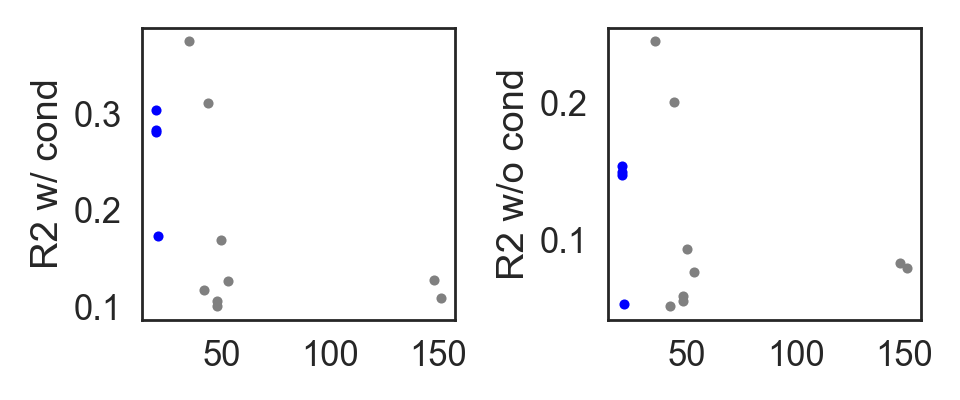

Animal grom, day 0, r2_no_cond 0.200, amt of data 19.0
Animal grom, day 1, r2_no_cond 0.245, amt of data 11.4
Animal grom, day 2, r2_no_cond 0.083, amt of data 25.8
Animal grom, day 3, r2_no_cond 0.077, amt of data 24.9
Animal grom, day 4, r2_no_cond 0.080, amt of data 19.5
Animal grom, day 5, r2_no_cond 0.052, amt of data 18.2
Animal grom, day 6, r2_no_cond 0.093, amt of data 7.0
Animal grom, day 7, r2_no_cond 0.059, amt of data 8.9
Animal grom, day 8, r2_no_cond 0.055, amt of data 8.6
Animal jeev, day 0, r2_no_cond 0.154, amt of data 13.4
Animal jeev, day 1, r2_no_cond 0.147, amt of data 8.0
Animal jeev, day 2, r2_no_cond 0.149, amt of data 8.5
Animal jeev, day 3, r2_no_cond 0.054, amt of data 9.4


In [95]:
####### plot r2 vs. Nneurons #########
f, ax = plt.subplots(ncols = 2, figsize=(6, 2.5))
color = ['gray', 'blue']
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file'], 'rb'))

for i_a, animal in enumerate(['grom', 'jeev']): 
    
    fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
    dat_ridge = pickle.load(open(fname, 'rb'))#, **pkl_kw)

    #### predict forward #######
    R2_pred_next_spks = []
    R2_pred_next_command = []

    #### ndays ######
    #ndays = analysis_config.data_params['%s_ndays'%animal] 
    if animal == 'grom': 
        ndays = 9
    elif animal == 'jeev': 
        ndays = 4

    for day_ix in range(ndays):  

        #### spks true #####
        spks      = dat_ridge[day_ix, 'spks']
        nNeurons = spks.shape[1]

        ### ridge spks #####
        pred_spks_nc = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
        pred_spks_wc = dat_ridge[day_ix, 'hist_1pos_0psh_2spksm_1_spksp_0'] ## w/ conditioning 
        
        ### Quick comparison for now ### 
        neural_push = dat_ridge[day_ix, 'np']
        command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
                                           vel_ix=[0, 1])[0]
        
        ### Magnitude less than 4 ###
        valid_ix = np.nonzero(command_bins[:, 0] < 4)[0]
                
        ### Get R2 for predicting next spkes ### 
        r2_spks_wc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_wc[valid_ix, :])
        r2_spks_nc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_nc[valid_ix, :])

        print('Animal %s, day %d, r2_no_cond %.3f, amt of data %.1f'%(animal, day_ix, r2_spks_nc, 
                                                    (spks.shape[0]/10.)/60.))
        ### Now plot these as a fcn of # of neurons? 
        ax[0].plot(nNeurons, r2_spks_wc, '.', color=color[i_a])
        ax[1].plot(nNeurons, r2_spks_nc, '.', color=color[i_a])
ax[0].set_ylabel('R2 w/ cond')
ax[1].set_ylabel('R2 w/o cond')
f.tight_layout()
util_fcns.savefig(f, 'r2_vs_nNeurons')

<IPython.core.display.Javascript object>


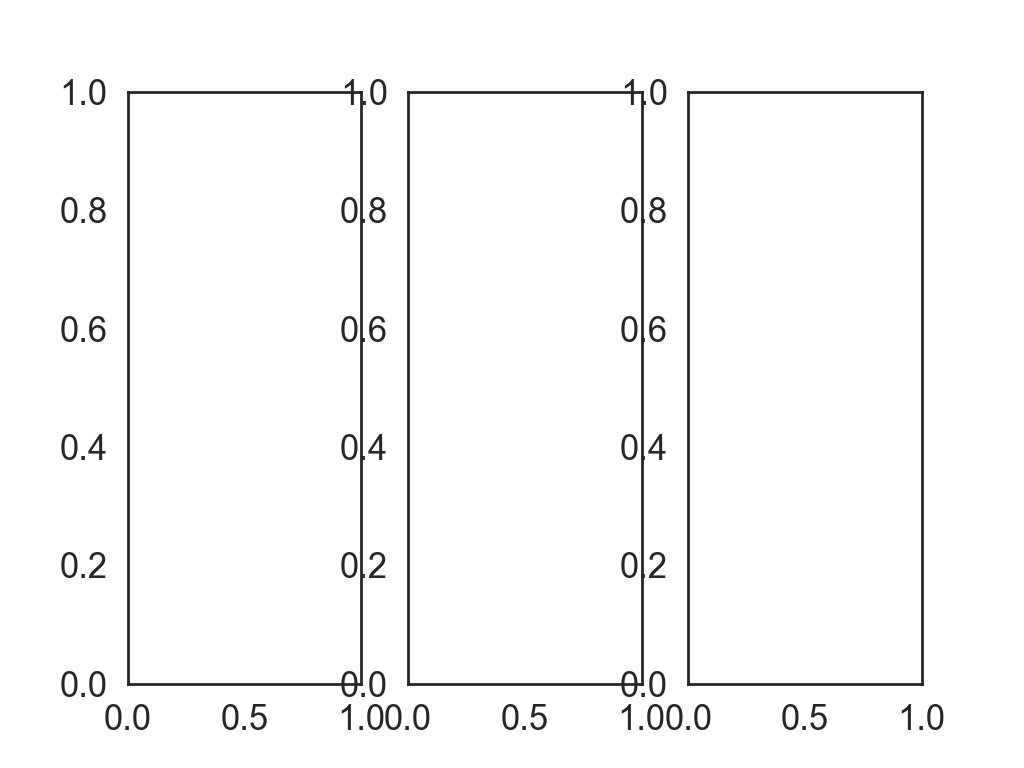

<IPython.core.display.Javascript object>


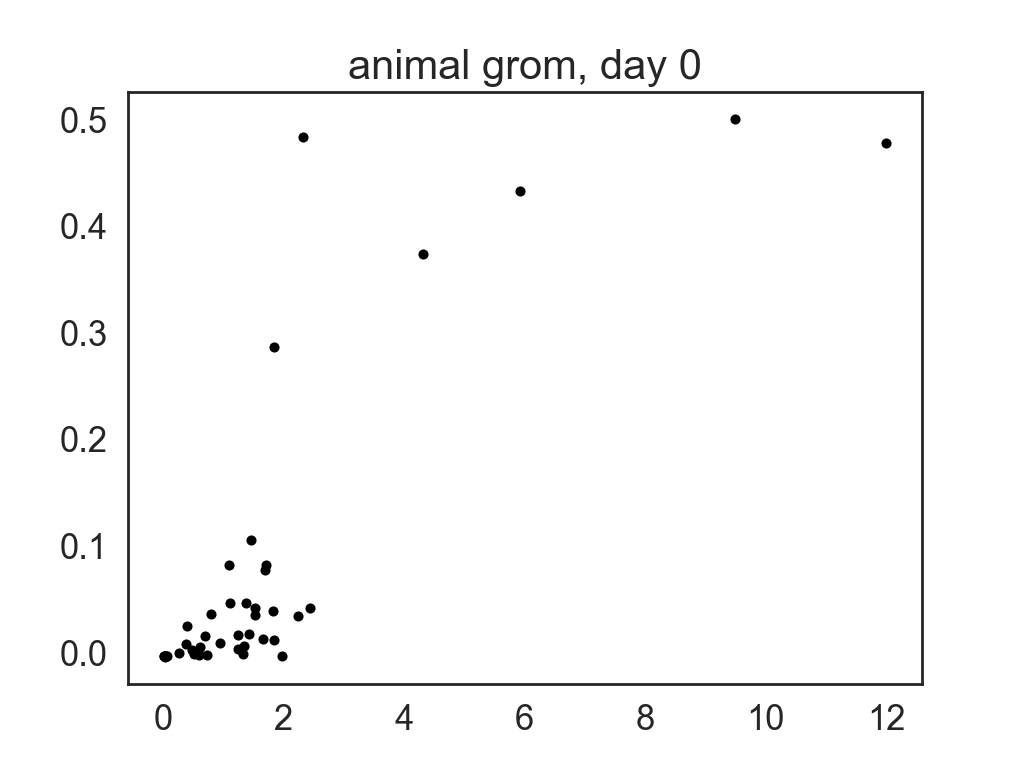

<IPython.core.display.Javascript object>


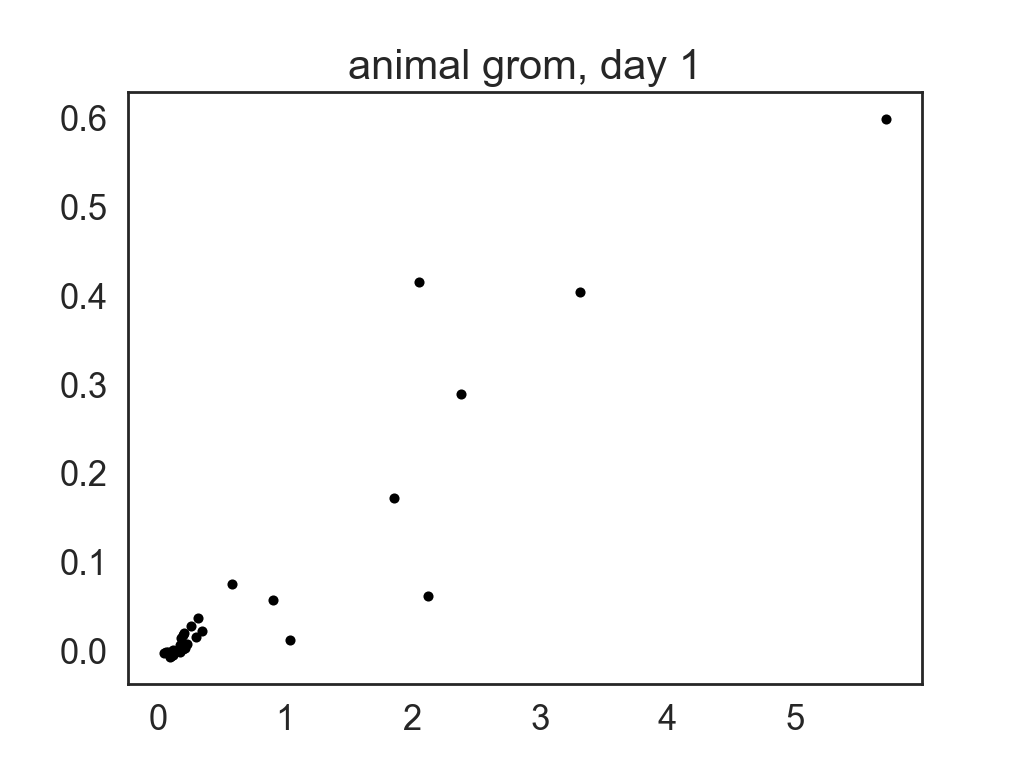

<IPython.core.display.Javascript object>


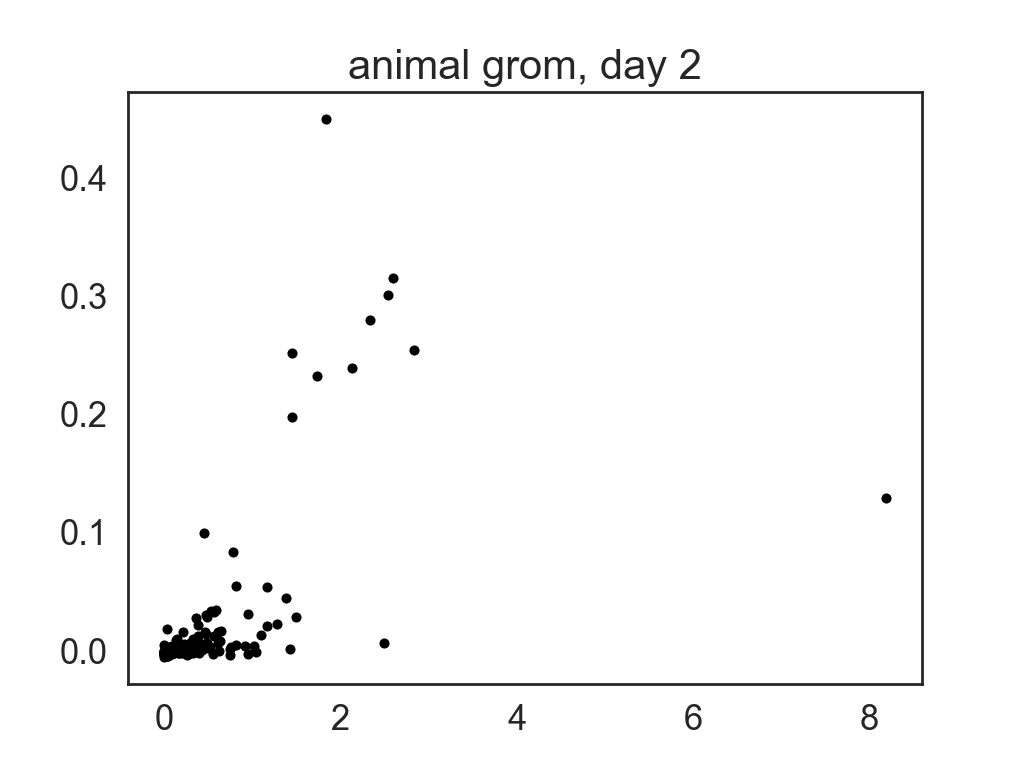

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


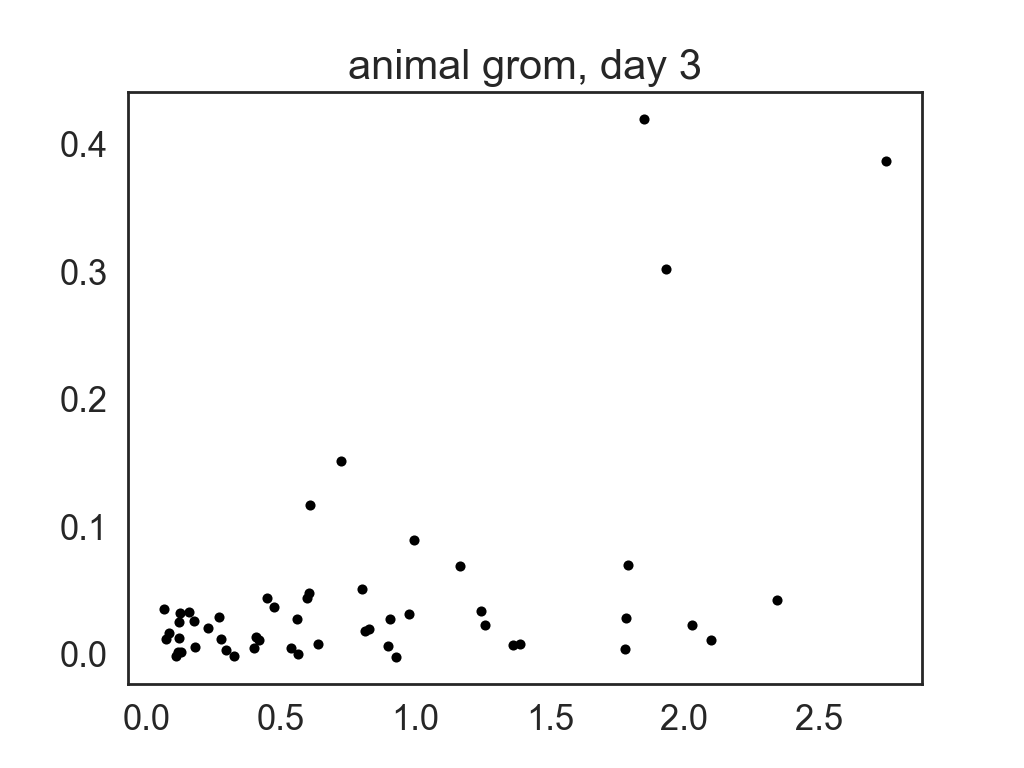

<IPython.core.display.Javascript object>


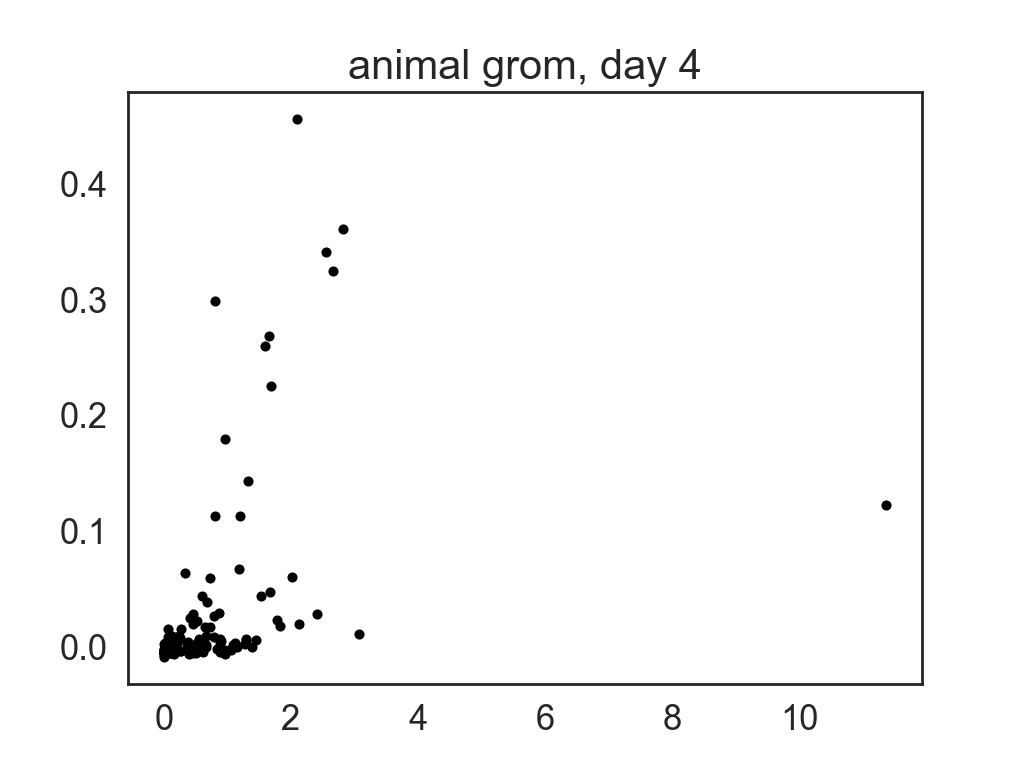

<IPython.core.display.Javascript object>


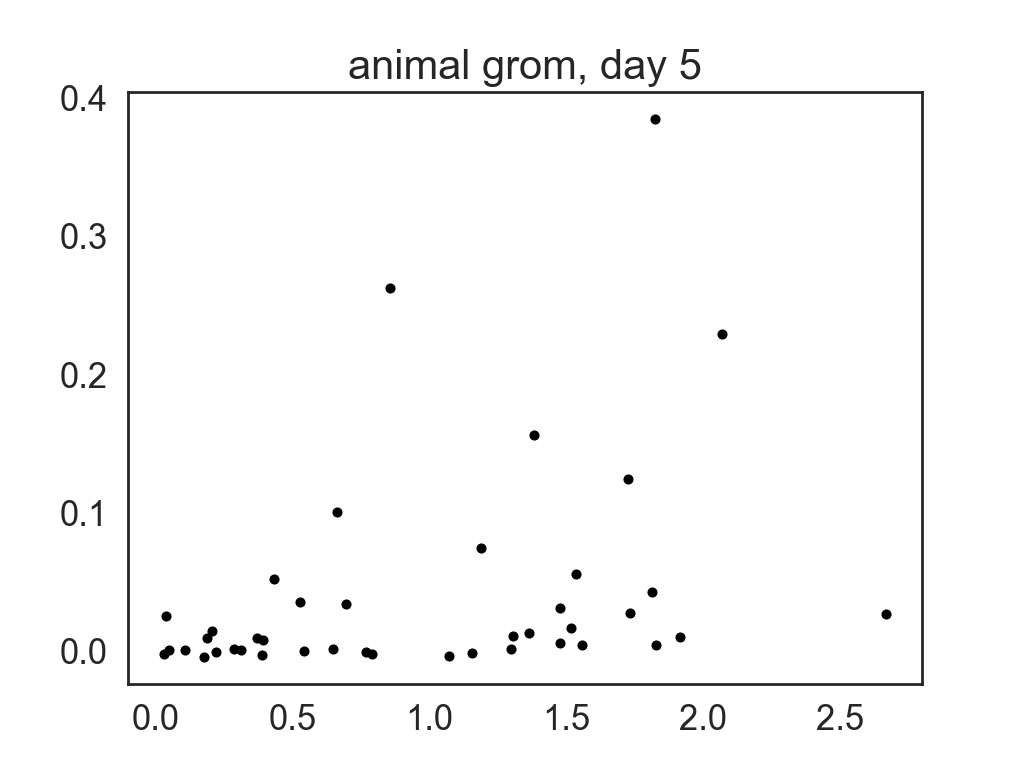

<IPython.core.display.Javascript object>


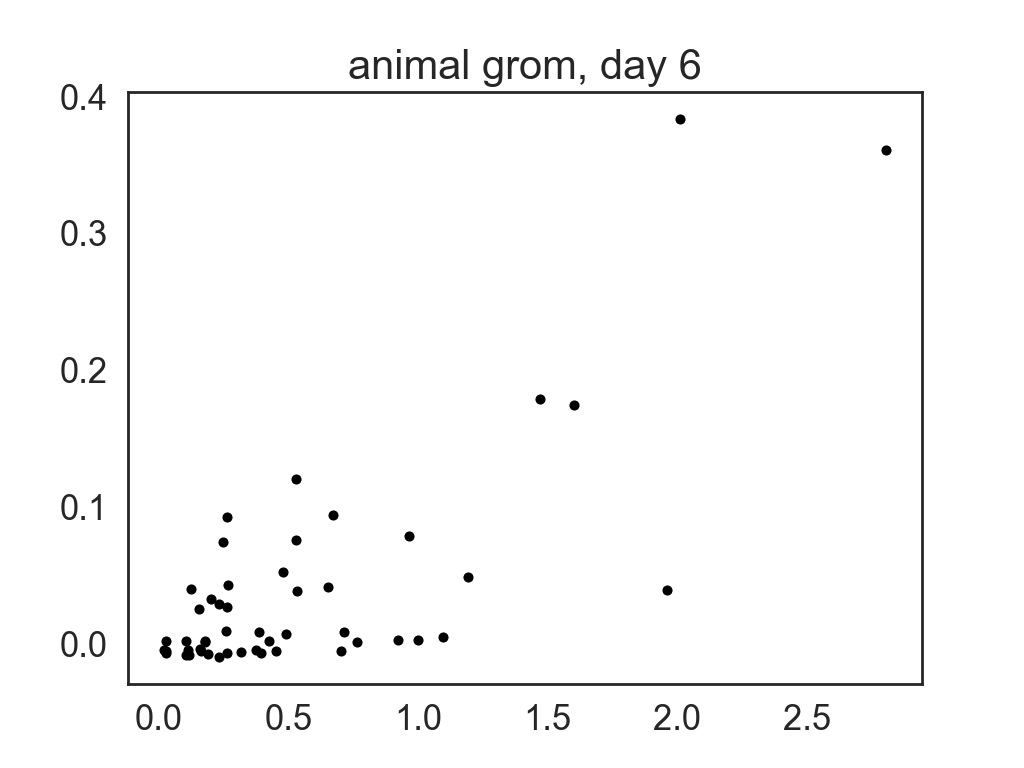

<IPython.core.display.Javascript object>


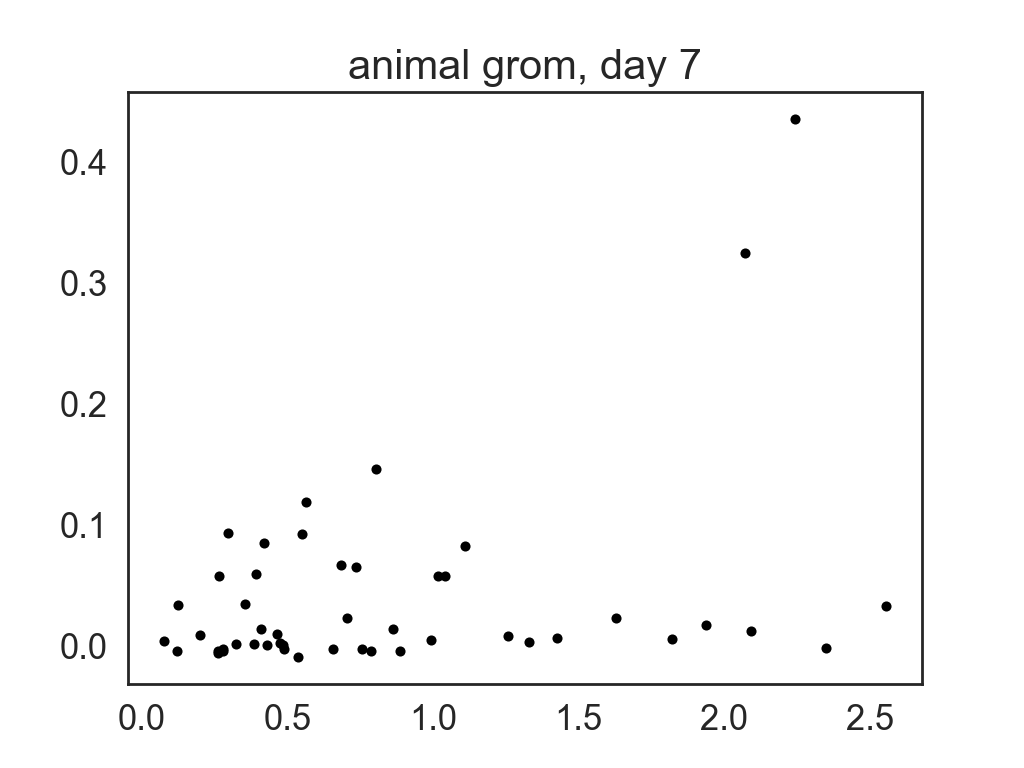

<IPython.core.display.Javascript object>


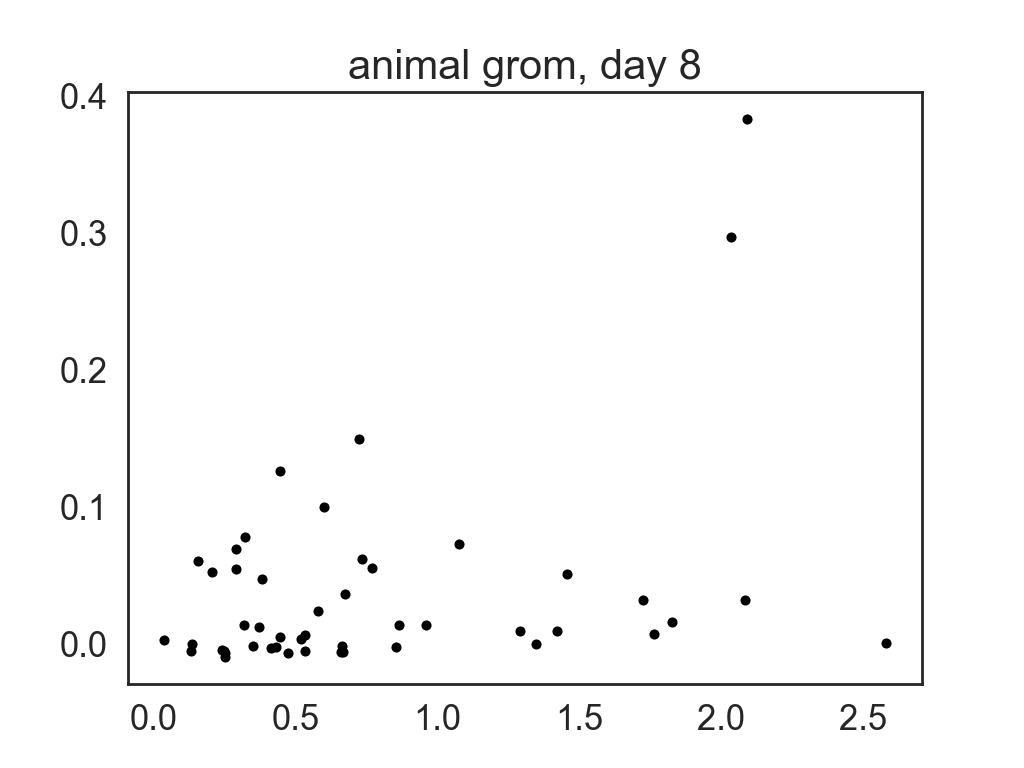

<IPython.core.display.Javascript object>


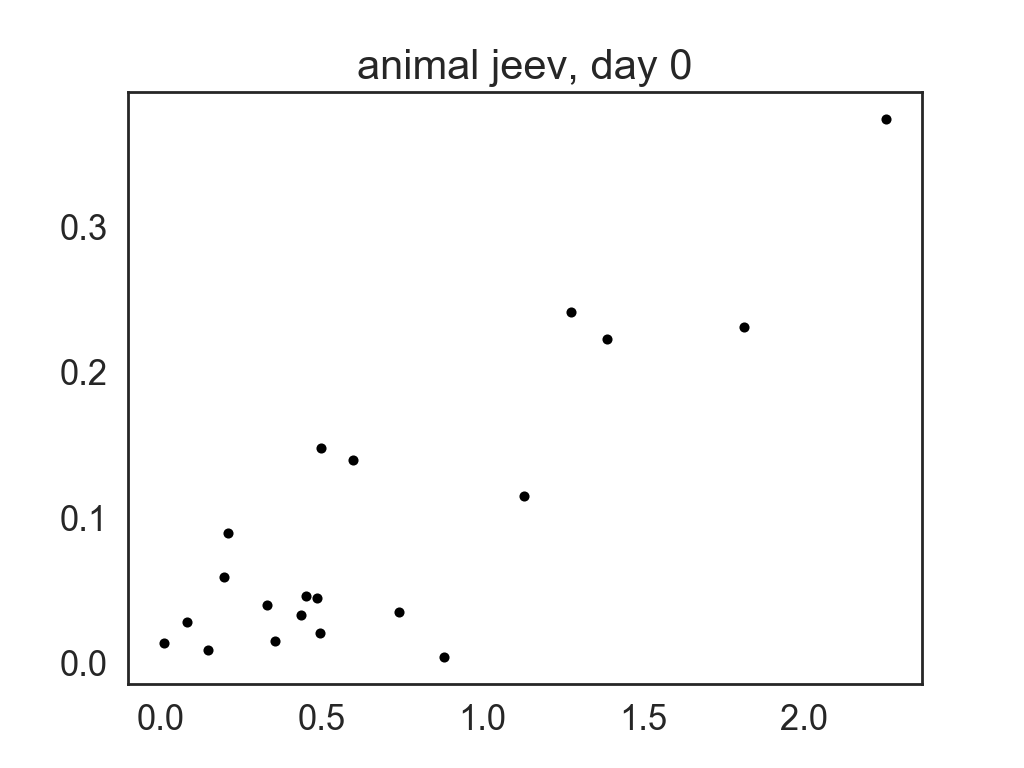

<IPython.core.display.Javascript object>


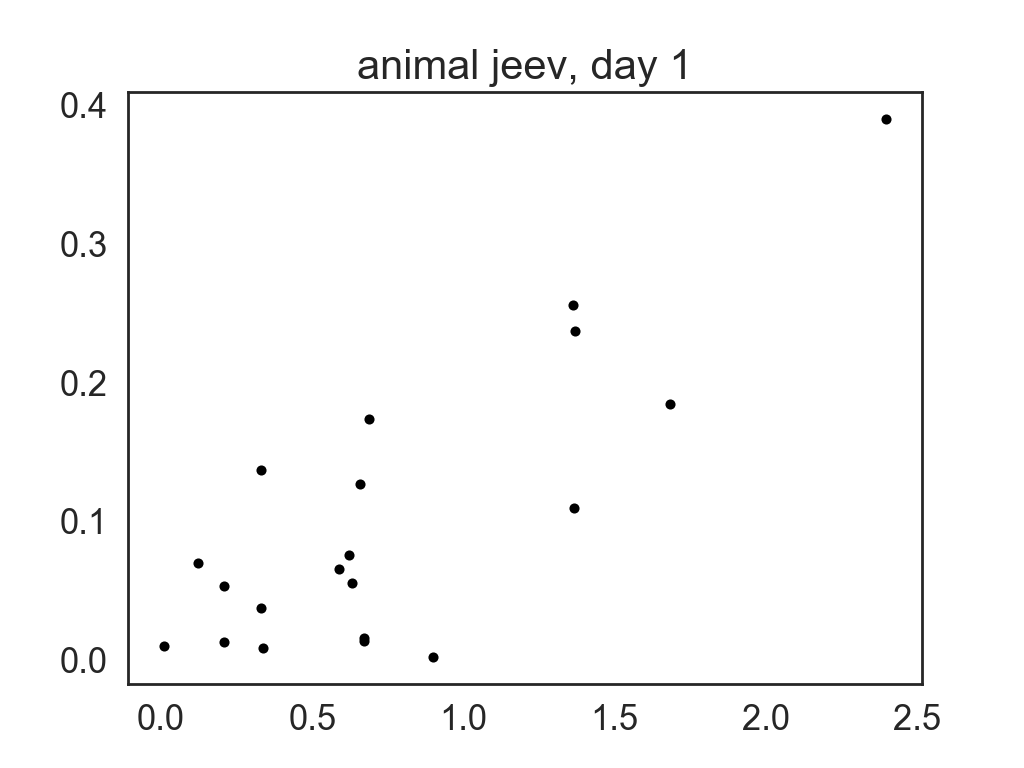

<IPython.core.display.Javascript object>


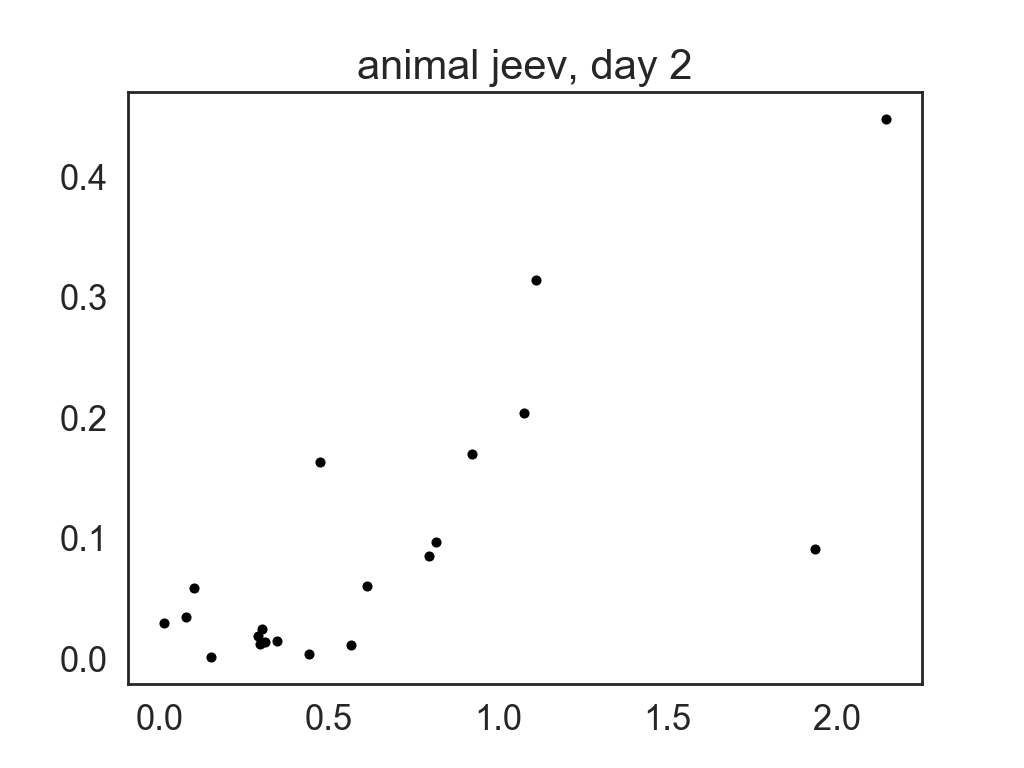

<IPython.core.display.Javascript object>


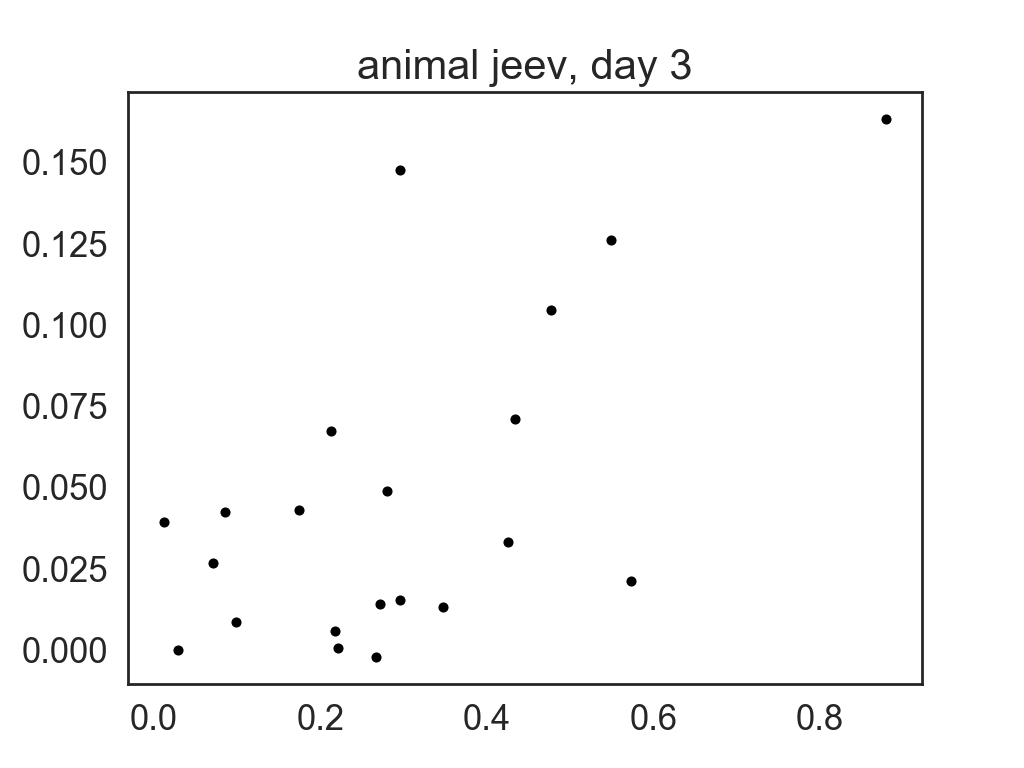

In [86]:
f, ax = plt.subplots(ncols = 3)
color = ['gray', 'blue']
mag_boundaries = pickle.load(open(analysis_config.data_params['mag_bound_file'], 'rb'))

for i_a, animal in enumerate(['grom', 'jeev']): 
    
    fname = analysis_config.config[animal+'_pref']+'tuning_models_%s_model_set6_.pkl'%animal
    dat_ridge = pickle.load(open(fname, 'rb'))#, **pkl_kw)

    #### predict forward #######
    R2_pred_next_spks = []
    R2_pred_next_command = []

    #### ndays ######
    #ndays = analysis_config.data_params['%s_ndays'%animal] 
    if animal == 'grom': 
        ndays = 9
    elif animal == 'jeev': 
        ndays = 4

    for day_ix in range(ndays):  

        #### spks true #####
        spks      = dat_ridge[day_ix, 'spks']
        nNeurons = spks.shape[1]

        ### ridge spks #####
        pred_spks_nc = dat_ridge[day_ix, 'hist_1pos_0psh_0spksm_1_spksp_0'] ## no conditioning 
        pred_spks_wc = dat_ridge[day_ix, 'hist_1pos_0psh_2spksm_1_spksp_0'] ## w/ conditioning 
        
        ### Quick comparison for now ### 
        neural_push = dat_ridge[day_ix, 'np']
        command_bins = util_fcns.commands2bins([neural_push], mag_boundaries, animal, day_ix, 
                                           vel_ix=[0, 1])[0]
        
        ### Magnitude less than 4 ###
        valid_ix = np.nonzero(command_bins[:, 0] < 10)[0]
                
        ### Get R2 for predicting next spkes ### 
        r2_spks_nc = util_fcns.get_R2(spks[valid_ix, :], pred_spks_nc[valid_ix, :])
        
        r2_ind = []
        for i in range(spks.shape[1]):
            r2_ind.append(util_fcns.get_R2(spks[valid_ix, i], pred_spks_nc[valid_ix, i]))
            
        f, ax2 = plt.subplots()
        _, _, impo = compute_neuron_importance(animal, day_ix)
        ax2.plot(impo, r2_ind, 'k.')
        #ax2.set_ylim([0, .5])
        ax2.set_title("animal %s, day %d"%(animal, day_ix))